<a href="https://colab.research.google.com/github/AliRKadhim/Cosmics/blob/master/Assessment/Data_Analytics_with_Python_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This assessment aims to evaluate your understanding and application of the concepts covered in the Data Analytics course. You will be tasked with analyzing a dataset related to remote work and mental health, utilizing various data manipulation, statistical analysis, and visualization techniques learned throughout the course. This exercise will help reinforce your skills in data handling, exploratory analysis, and drawing meaningful insights from data.

### Submission Details:

The deadline for submission is 16 November at 11:59 PM. Specific submission details will be shared with you shortly.

### Passing Criteria:

To successfully pass this assessment, you must achieve a score of 80% or higher.
We encourage you to engage with the material and demonstrate your analytical skills. Good luck!


---



# Section 1 - Beginner (25%)


## Shopping Cart System with Discounts

Write a Python program to simulate a shopping cart system for an online store. The program will calculate the total cost of items, apply discounts, and check if the total exceeds a specified budget.

1.	Variables and Lists:
  - Define a `budget` variable with an initial value of 200.
  
  - Create two empty lists called `item_names_list` and `item_prices_list` to store the name and price of each item separately.

In [13]:
budget = 200
item_names_list = []
item_prices_list = []

2. Functions:
  - Write a function `add_item_to_cart(item_name, item_price)` that takes the item’s name and price as arguments, appends the name to item_names and the price to item_prices, and returns both updated lists.
  
  - Write a function `calculate_total(item_prices)` that calculates and returns the total cost of all items in item_prices.

    Conditions:
    - If the total cost exceeds the budget after adding an item, print "Budget exceeded!" and stop adding more items.
    - If the total cost is within budget and exceeds $100, apply a 10% discount on the total and print the discounted total.

In [14]:
def add_item_to_cart(item_name, item_price):
  item_names_list.append(item_name)
  item_prices_list.append(item_price)
  return item_names_list, item_prices_list

def calculate_total(item_prices):
    total = sum(item_prices)  # Calculate total directly using sum()

    if total > budget:
        print("Budget exceeded!")
        return total, True  # Returning a flag to indicate budget exceeded

    if total > 100:
        discounted_total = total * 0.9  # Apply 10% discount
        print(f"Discount applied! Discounted total: ${discounted_total:.2f}")
        return discounted_total, False

    return total, False

3.	Loop and Input:
  - Start the input only once the user says 'start'
  - Use a loop to allow the user to add items to the cart by entering an item name and price. The loop should stop when the user types 'done'.
  - For each item, add it to item_names and item_prices using add_item_to_cart, then update the total cost using calculate_total.

Output:
  - After the loop ends, display the final cart with each item and its price, the initial total, any applicable discount, and the final total.


In [15]:
while input("Enter 'start' to begin and 'done' when you want to finish: ").lower() != "start":
    pass

while True:
    item_name = input("Enter item name: ")
    if item_name.lower() == "done":
        break

    try:
        item_price = float(input("Enter item price: "))
    except ValueError:
        print("Invalid price. Please enter a number.")
        continue  # Skip the current iteration if price is invalid

    # Add the item to the cart
    add_item_to_cart(item_name, item_price)

    # Calculate the total and check conditions
    total, budget_exceeded = calculate_total(item_prices_list)
    if budget_exceeded:
        break  # Stop adding items if the budget is exceeded

# Output Final Cart Details
print("\nFinal Cart:")
for name, price in zip(item_names_list, item_prices_list):
    print(f"- {name}: ${price:.2f}")

initial_total = sum(item_prices_list)
if initial_total > 100:
    final_total = initial_total * 0.9
else:
    final_total = initial_total

print(f"\nInitial Total: ${initial_total:.2f}")
if initial_total > 100:
    print(f"Discount Applied: 10%")
print(f"Final Total: ${final_total:.2f}")

Enter 'start' to begin and 'done' when you want to finish: done
Enter 'start' to begin and 'done' when you want to finish: start
Enter item name: apple
Enter item price: done
Invalid price. Please enter a number.
Enter item name: juice
Enter item price: done
Invalid price. Please enter a number.
Enter item name: cheese
Enter item price: 5
Enter item name: done

Final Cart:
- cheese: $5.00

Initial Total: $5.00
Final Total: $5.00


# Section 2 - Intermidiate (55%) - Remote Work and Mental Health Analysis

Dataset source: Kaggle (https://www.kaggle.com/datasets/waqi786/remote-work-and-mental-health)




## Objective:
- In the following sections, you will explore the "Remote Work and Mental Health" dataset using Python and different data science libraries such as Pandas, NumPy and Matplotlib.
- Follow the instructions below to complete each task. Please provide code for each question and any observations as comments when necessary.

In [17]:
# Import necessary modules and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


## 1. Load Dataset (2 marks)
- Instructions: Load the dataset using Pandas and display few rows.
- Question: Describe the overall structure (rows, columns, data types) as a comment at the end of your code.


In [44]:
df = pd.read_csv('dataset.csv')
df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


## 2. Display 'n' Rows (3 marks)
- Instructions: Display the first 13 rows of the dataset.

In [20]:
df.head(13)

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
5,EMP0006,59,Non-binary,Sales,IT,31,Hybrid,39,3,4,High,NaN,No,Increase,5,Unsatisfied,1,NaN,Average,South America
6,EMP0007,31,Prefer not to say,Sales,IT,24,Remote,51,7,3,Low,Anxiety,Yes,Decrease,5,Neutral,3,Daily,Poor,Asia
7,EMP0008,42,Non-binary,Data Scientist,Manufacturing,6,Onsite,54,7,3,Medium,Depression,No,Decrease,5,Satisfied,4,NaN,Average,North America
8,EMP0009,56,Prefer not to say,Data Scientist,Healthcare,9,Hybrid,24,4,2,High,NaN,Yes,Decrease,2,Unsatisfied,4,Daily,Poor,Europe
9,EMP0010,30,Female,HR,IT,28,Hybrid,57,6,1,Low,Depression,Yes,Decrease,2,Neutral,1,Weekly,Poor,North America


- Instructions: Display the last 7 rows of the dataset

In [21]:
df.tail(7)

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
4993,EMP4994,35,Non-binary,Marketing,Retail,12,Hybrid,32,13,5,Medium,NaN,Yes,Decrease,2,Satisfied,3,Daily,Good,Asia
4994,EMP4995,40,Prefer not to say,Marketing,IT,17,Hybrid,52,1,2,Medium,Burnout,Yes,Increase,3,Neutral,5,Daily,Good,Oceania
4995,EMP4996,32,Male,Sales,Consulting,4,Onsite,24,2,5,High,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia
4996,EMP4997,39,Female,Sales,Healthcare,27,Onsite,48,15,1,Low,Depression,Yes,Decrease,1,Satisfied,1,NaN,Average,Africa
4997,EMP4998,42,Female,Sales,Healthcare,21,Hybrid,34,1,4,High,Burnout,No,Increase,3,Satisfied,1,Daily,Poor,Oceania
4998,EMP4999,27,Female,Sales,Healthcare,26,Remote,58,0,5,Low,NaN,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia
4999,EMP5000,29,Male,HR,IT,30,Onsite,20,15,1,Low,Depression,Yes,No Change,3,Unsatisfied,5,NaN,Poor,Asia


## 3. Find the Number of Null Values in the Dataset (2 mark)

In [22]:
df.isnull().sum()

,0
Employee_ID,0
Age,0
Gender,0
Job_Role,0
Industry,0
Years_of_Experience,0
Work_Location,0
Hours_Worked_Per_Week,0
Number_of_Virtual_Meetings,0
Work_Life_Balance_Rating,0


## 4. Statistical Summary for Numeric Columns (10 marks)
Instructions: Use individual commands to find the statistical summary.

- Count

In [26]:
df.count()


,0
Employee_ID,5000
Age,5000
Gender,5000
Job_Role,5000
Industry,5000
Years_of_Experience,5000
Work_Location,5000
Hours_Worked_Per_Week,5000
Number_of_Virtual_Meetings,5000
Work_Life_Balance_Rating,5000


- Mean

In [30]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
numeric_columns.mean()

,0
Age,40.9950
Years_of_Experience,17.8102
Hours_Worked_Per_Week,39.6146
Number_of_Virtual_Meetings,7.5590
Work_Life_Balance_Rating,2.9842
Social_Isolation_Rating,2.9938
Company_Support_for_Remote_Work,3.0078


- Standard Deviation

In [31]:
numeric_columns.std()


,0
Age,11.296021
Years_of_Experience,10.020412
Hours_Worked_Per_Week,11.860194
Number_of_Virtual_Meetings,4.636121
Work_Life_Balance_Rating,1.410513
Social_Isolation_Rating,1.394615
Company_Support_for_Remote_Work,1.399046


- Quartiles

In [32]:
numeric_columns.quantile([0.25, 0.5, 0.75])


,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work
0.25,31.0,9.0,29.0,4.0,2.0,2.0,2.0
0.50,41.0,18.0,40.0,8.0,3.0,3.0,3.0
0.75,51.0,26.0,50.0,12.0,4.0,4.0,4.0


## 5. Calculate Extrema (2 marks)

In [42]:
print('Minimum in numerical columns: ')
numeric_columns.min()

Minimum in numerical columns: 


,0
Age,22
Years_of_Experience,1
Hours_Worked_Per_Week,20
Number_of_Virtual_Meetings,0
Work_Life_Balance_Rating,1
Social_Isolation_Rating,1
Company_Support_for_Remote_Work,1


In [40]:
print('Maximum in numerical columns: ')
numeric_columns.max()

Maximum in numerical columns: 


,0
Age,60
Years_of_Experience,35
Hours_Worked_Per_Week,60
Number_of_Virtual_Meetings,15
Work_Life_Balance_Rating,5
Social_Isolation_Rating,5
Company_Support_for_Remote_Work,5


## 6. Find Unique Values in a Categorical Column (3 marks)

- Instructions: Identify the unique values in the `job_role` column (2 marks)
- Question: How many unique roles are represented in the dataset? (1 mark)

In [47]:
job_Role = df['Job_Role']
unique_roles = job_Role.unique()
print(unique_roles)
print('Number of unique roles:', len(unique_roles))

['HR' 'Data Scientist' 'Software Engineer' 'Sales' 'Marketing' 'Designer'
 'Project Manager']
Number of unique roles: 7


## 7. Group Data and Calculate Mean (4 marks)
- Instructions: Group the dataset by `job_role` and calculate the mean of the `Work_Life_Balance_Rating` for each role.
- Question: Which job role has the highest average Work life balance?

In [56]:
grouped_data = df.groupby('Job_Role')
caclulated_Balance = grouped_data['Work_Life_Balance_Rating'].mean()
print('Job with the highest average work life balance is: ', caclulated_Balance.idxmax())
caclulated_Balance


Job with the highest average work life balance is:  Sales


,Work_Life_Balance_Rating
Job_Role,
Data Scientist,3.007184
Designer,2.966805
HR,2.930168
Marketing,2.945827
Project Manager,2.960705
Sales,3.043656
Software Engineer,3.033755


## 8. Filter Data Based on Condition (4 marks)
- Instructions: Filter the dataset to show only rows where `work_hours_per_week` is greater than 40.
- Question: How many employees are working overtime?

In [70]:
filtered_data = df[df['Hours_Worked_Per_Week'] > 40]
print('Number of employees working overtime: ', filtered_data.shape[0])
filtered_data



Number of employees working overtime:  2384


,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
6,EMP0007,31,Prefer not to say,Sales,IT,24,Remote,51,7,3,Low,Anxiety,Yes,Decrease,5,Neutral,3,Daily,Poor,Asia
7,EMP0008,42,Non-binary,Data Scientist,Manufacturing,6,Onsite,54,7,3,Medium,Depression,No,Decrease,5,Satisfied,4,NaN,Average,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991,EMP4992,60,Female,Data Scientist,IT,9,Hybrid,57,4,2,Low,Burnout,Yes,Increase,4,Satisfied,5,Weekly,Average,Oceania
4992,EMP4993,55,Prefer not to say,Project Manager,Consulting,21,Hybrid,45,7,2,High,Anxiety,No,No Change,2,Satisfied,3,Daily,Poor,Africa
4994,EMP4995,40,Prefer not to say,Marketing,IT,17,Hybrid,52,1,2,Medium,Burnout,Yes,Increase,3,Neutral,5,Daily,Good,Oceania
4996,EMP4997,39,Female,Sales,Healthcare,27,Onsite,48,15,1,Low,Depression,Yes,Decrease,1,Satisfied,1,NaN,Average,Africa


## 9 . Histogram of Work Hours per Week (5 marks)
- Instructions: Create a histogram of `Hours_Worked_Per_Week` (4 marks).
- Question: Describe the distribution of work hours. Are most employees working around a certain number of hours per week? (1 mark)

There is a quite uniform distribution of the hours worked from 25-60. with the highest number of employees working 60 hours


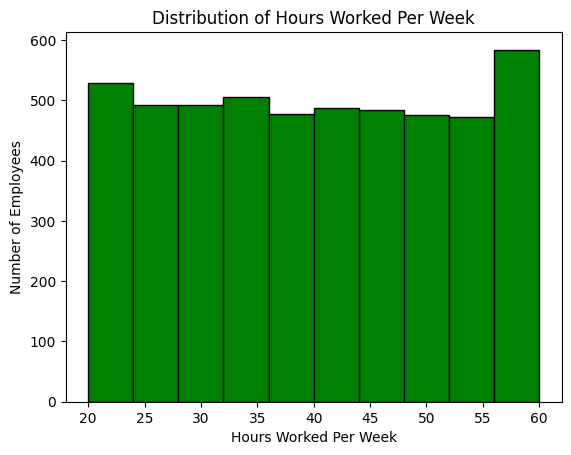

In [85]:
plt.hist(df['Hours_Worked_Per_Week'], bins=10, color="green", edgecolor="black")
plt.xlabel('Hours Worked Per Week')
plt.ylabel('Number of Employees')
plt.title('Distribution of Hours Worked Per Week')
print('There is a quite uniform distribution of the hours worked from 25-60. with the highest number of employees working 60 hours')
plt.show()

## 10. Scatter Plot of Work Hours vs. Years_of_Experience (4 marks)
- Instructions: Create a scatter plot with `Hours_Worked_Per_Week` on the x-axis and `Years_of_Experience` on the y-axis.

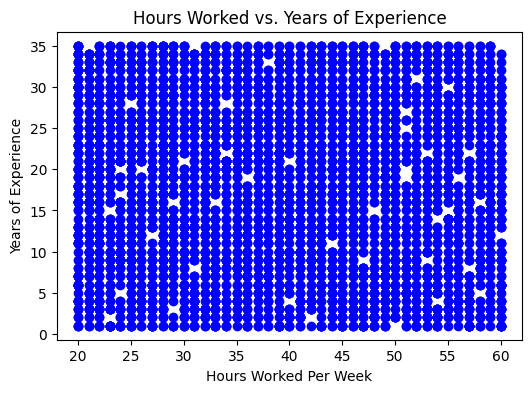

In [83]:
plt.figure(figsize=(6, 4))
plt.scatter(df['Hours_Worked_Per_Week'], df['Years_of_Experience'], color="blue", marker="o")
plt.xlabel('Hours Worked Per Week')
plt.ylabel('Years of Experience')
plt.title('Hours Worked vs. Years of Experience')
plt.show()

## 11. Bar Chart of Average Work Life Balance by Job Role (5 marks)
- Instructions: Create a bar chart showing the average `Work_Life_Balance_Rating` for each `Job_Role` (4 marks).
- Question: Which job roles have the highest and lowest average mental Work Life Balance? (1 mark)

Job with the highest average work life balance is:  Sales
Job with the lowest average work life balance is:  HR


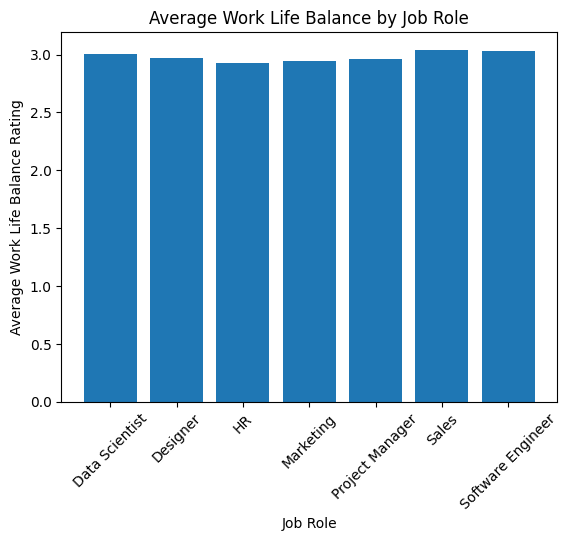

In [89]:
grouped_job_role = df.groupby('Job_Role')
max_balance = grouped_job_role['Work_Life_Balance_Rating'].mean().idxmax()
min_balance = grouped_job_role['Work_Life_Balance_Rating'].mean().idxmin()
print('Job with the highest average work life balance is: ', max_balance)
print('Job with the lowest average work life balance is: ', min_balance)
average_balance = grouped_job_role['Work_Life_Balance_Rating'].mean()
plt.bar(average_balance.index, average_balance.values)
plt.xlabel('Job Role')
plt.ylabel('Average Work Life Balance Rating')
plt.title('Average Work Life Balance by Job Role')
plt.xticks(rotation=45)
plt.show()


## 12. Pie Chart of Workload Level Distribution (5 marks)
- Instructions: Use a pie chart to show the proportion of `Access_to_Mental_Health_Resources` (Yes and no) in the dataset (4 marks).
- Question: What percentage of employees have access to mental health resources? (1 mark)

Employees with access to mental health resources:  48.94 %


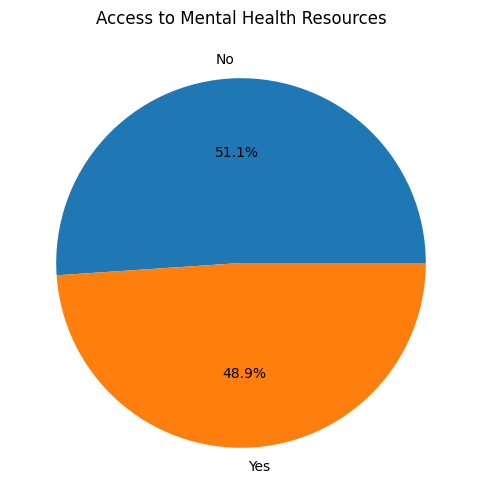

In [112]:
accessColumn = df[['Access_to_Mental_Health_Resources']]
totalNumber = accessColumn['Access_to_Mental_Health_Resources'].count()
has_Access = accessColumn[accessColumn['Access_to_Mental_Health_Resources'] == "Yes"].count().values[0]
percentage_Access = has_Access / totalNumber
print("Employees with access to mental health resources: ", (percentage_Access * 100).round(2), "%")
plt.figure(figsize=(6, 6))
plt.pie(df['Access_to_Mental_Health_Resources'].value_counts(), labels=df['Access_to_Mental_Health_Resources'].unique(), autopct='%1.1f%%')
plt.title('Access to Mental Health Resources')
plt.show()



## 13. Scatter Plot of Age vs. Social Isolation Rating (6 marks)
- Instructions: Create a scatter plot with `age` on the x-axis and `Social_Isolation_Rating` on the y-axis (4 marks).
- Question: Do you observe any trends or relationships between age and social isolation? Is there a noticeable impact of age on isoloation? (2 marks)

It appears that there is no clear relationship between age and social isolation


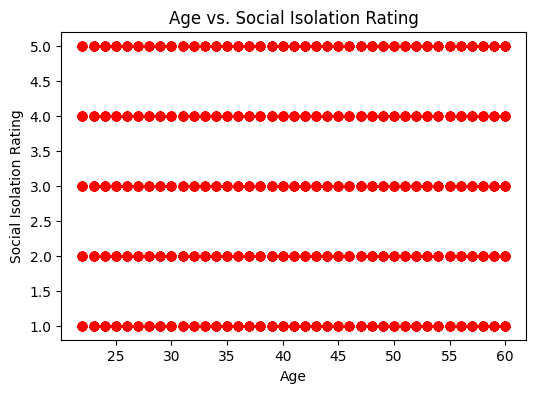

In [115]:
print("It appears that there is no clear relationship between age and social isolation")
plt.figure(figsize=(6, 4))
plt.scatter(df['Age'], df['Social_Isolation_Rating'], color="red", marker="o")
plt.xlabel('Age')
plt.ylabel('Social Isolation Rating')
plt.title('Age vs. Social Isolation Rating')
plt.show()


# Section 3 - Long Answer/Advanced (20%)



## Job Role and Workload Level Impact on Mental Health

Instructions: Investigate the influence of job roles and workload level on the mental health.
- Create a new column `workload_level` that labels each entry as "High" if the `Hours_Worked_Per_Week` is above its mean, otherwise "Low." (5 marks)
- Group the dataset by `Industry` and calculate the average `Hours_Worked_Per_Week` for each combination. (5 marks)
- Use a bar chart to display the average `Stress_Level` for each job role, with separate bars for high and low stress levels. (5 marks)
- Analyze the results: Which job roles and workload levels appear to have the greatest impact on mental health? (5 marks)


         Industry           Job_Role  Hours_Worked_Per_Week
0      Consulting     Data Scientist              39.315217
1      Consulting           Designer              40.304348
2      Consulting                 HR              38.568807
3      Consulting          Marketing              40.204082
4      Consulting    Project Manager              38.521739
5      Consulting              Sales              38.600000
6      Consulting  Software Engineer              39.041237
7       Education     Data Scientist              37.581633
8       Education           Designer              39.360000
9       Education                 HR              38.232323
10      Education          Marketing              38.888889
11      Education    Project Manager              42.055556
12      Education              Sales              38.604651
13      Education  Software Engineer              40.211009
14        Finance     Data Scientist              38.096154
15        Finance           Designer    

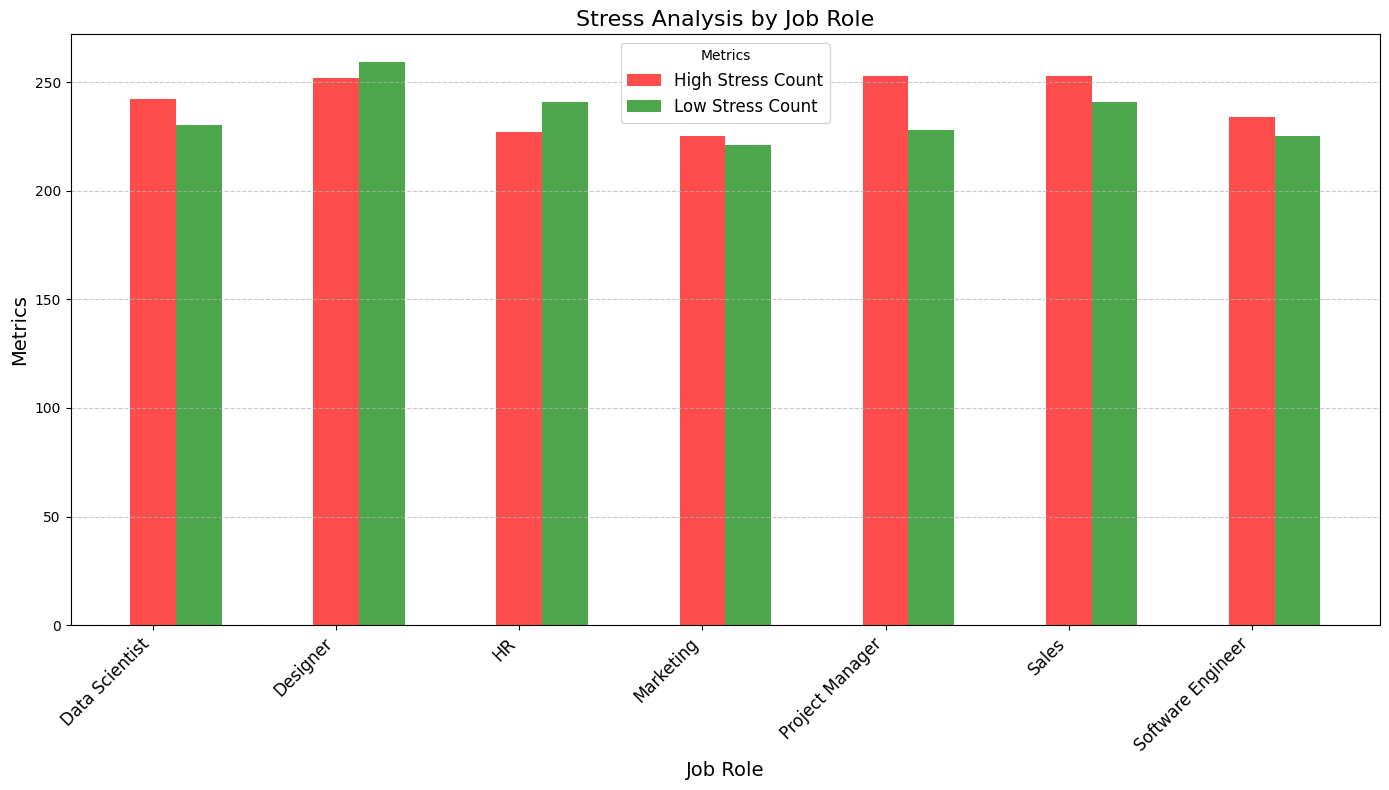

In [139]:
# Group by Industry and Job_Role, and calculate the average Hours_Worked_Per_Week
avg_hours = df.groupby(['Industry', 'Job_Role'])['Hours_Worked_Per_Week'].mean().reset_index()

# Display the result
print(avg_hours)


# Map Stress_Level to numeric values
stress_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['Stress_Level_Numeric'] = df['Stress_Level'].map(stress_mapping)

# Calculate the average Stress_Level for each Job_Role
avg_stress = df.groupby('Job_Role')['Stress_Level_Numeric'].mean().reset_index()

# Count occurrences of High and Low Stress Levels for each Job_Role
high_stress_count = df[df['Stress_Level'] == 'High'].groupby('Job_Role').size().reset_index(name='High_Stress_Count')
low_stress_count = df[df['Stress_Level'] == 'Low'].groupby('Job_Role').size().reset_index(name='Low_Stress_Count')

# Merge data into a single DataFrame for visualization
stress_data = avg_stress.merge(high_stress_count, on='Job_Role', how='left').merge(low_stress_count, on='Job_Role', how='left')
stress_data.fillna(0, inplace=True)  # Replace NaN counts with 0


# Extract data for plotting
job_roles = stress_data['Job_Role']
avg_stress = stress_data['Stress_Level_Numeric']
high_stress = stress_data['High_Stress_Count']
low_stress = stress_data['Low_Stress_Count']

# Define bar width and x positions
bar_width = 0.25
x_positions = np.arange(len(job_roles))

# Initialize the plot
plt.figure(figsize=(14, 8))



# Plot count of High Stress Levels
plt.bar(x_positions + bar_width, high_stress, bar_width, label='High Stress Count', alpha=0.7, color='red')

# Plot count of Low Stress Levels
plt.bar(x_positions + 2 * bar_width, low_stress, bar_width, label='Low Stress Count', alpha=0.7, color='green')

# Customize the chart
plt.title("Stress Analysis by Job Role", fontsize=16)
plt.xlabel("Job Role", fontsize=14)
plt.ylabel("Metrics", fontsize=14)
plt.xticks(x_positions + bar_width, job_roles, rotation=45, ha='right', fontsize=12)
plt.legend(title="Metrics", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()



